In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
npInputDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npInputDataset.npy")
npXTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npXTargetDataset.npy")
npYTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npYTargetDataset.npy")
npUTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npUTargetDataset.npy")
npVTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npVTargetDataset.npy")
npAccXTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npXTargetDataset.npy")
npAccYTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npAccYTargetDataset.npy")
npRhoTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npRhoTargetDataset.npy")
npPTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npPTargetDataset.npy")
npCollidingTotal = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npCollidingTotal.npy")

In [3]:
npXTargetDataset = np.expand_dims(npXTargetDataset, axis=-1)
npYTargetDataset= np.expand_dims(npYTargetDataset, axis=-1)
npUTargetDataset= np.expand_dims(npUTargetDataset, axis=-1)
npVTargetDataset= np.expand_dims(npVTargetDataset, axis=-1)
npAccXTargetDataset = np.expand_dims(npAccXTargetDataset, axis=-1)
npAccYTargetDataset= np.expand_dims(npAccYTargetDataset, axis=-1)
npRhoTargetDataset =np.expand_dims(npRhoTargetDataset, axis=-1)
npPTargetDataset = np.expand_dims(npPTargetDataset, axis=-1)
npCollidingTotal = np.expand_dims(npCollidingTotal,axis=-1)

# Data overview

In [4]:
# The number of data
NData = 100

# The number of particles
NParticles = 100

# The number of TimeSteps
NTimeSteps = 200

# The number of Targets
NTargets = 8

In [5]:
class SPHData:
    
    def __init__(self,TargetName,Unit,NData,NParticles,NTimeSteps, TargetDataset):
        
        
        self.TargetName = TargetName
        self.Unit = Unit
        self.NData = NData
        self.NParticles = NParticles
        self.NTimeSteps = NTimeSteps
        self.TargetDataset = TargetDataset
    
    def meanDataset(self, NData):
        
        return  np.sum(self.TargetDataset, axis=-4)/NData
    
    def variDataset(self, NData):
        
        return np.sum((self.TargetDataset - self.meanDataset(NData))**2,axis=-4)/NData
    
    def stdDataset(self, Ndata):
        
        return np.sqrt(self.variDataset(Ndata))       
    
    
    def rollerEffectperData(self, AngularVelocity):
        
        perData = np.sum(np.sum(self.TargetDataset, axis=-2),axis=-2)/(self.NParticles * self.NTimeSteps)
        pdData = pd.DataFrame(AngularVelocity)
        pdData["1"] = perData
        pdData.sort_values(by=0, inplace=True)
        
        return pdData.to_numpy()
        
        
        
        

In [23]:
np.sum(np.sum(npXTargetDataset, axis=-2),axis = -2).shape

(100, 1)

In [6]:
Model1 = SPHData(TargetName="The x-coordinates of the particles",
                 Unit="[m]",
                 NData= NData,
                 NParticles= NParticles,
                 NTimeSteps=NTimeSteps,
                 TargetDataset=npXTargetDataset
                 )
Model2 = SPHData(TargetName="The y-coordinates of the particles",
                 Unit="[m]",
                 NData= NData,
                 NParticles= NParticles,
                 NTimeSteps=NTimeSteps,
                 TargetDataset=npYTargetDataset
                 )
Model3 = SPHData(TargetName="The x-direction velocity of the particles",
                 Unit="[m/s]",
                 NData= NData,
                 NParticles= NParticles,
                 NTimeSteps=NTimeSteps,
                 TargetDataset=npUTargetDataset
                 )
Model4 = SPHData(TargetName="The y-direction velocity of the particles",
                 Unit="[m/s]",
                 NData= NData,
                 NParticles= NParticles,
                 NTimeSteps=NTimeSteps,
                 TargetDataset=npVTargetDataset

                 )
Model5 = SPHData(TargetName="The x-direction acceleration of the particles",
                 Unit="[m/s^2]",
                 NData= NData,
                 NParticles= NParticles,
                 NTimeSteps=NTimeSteps,
                 TargetDataset=npAccXTargetDataset
                 )
Model6 = SPHData(TargetName="The y-direction acceleration of the particles",
                 Unit="[m/s^2]",
                 NData= NData,
                 NParticles= NParticles,
                 NTimeSteps=NTimeSteps,
                 TargetDataset=npAccYTargetDataset
                 )
Model7 = SPHData(TargetName="The density of the particles",
                 Unit="[kg/m^3]",
                 NData= NData,
                 NParticles= NParticles,
                 NTimeSteps=NTimeSteps,
                 TargetDataset=npRhoTargetDataset
                 )
Model8 = SPHData(TargetName="The pressure of the particles",
                 Unit="[Pa]",
                 NData= NData,
                 NParticles= NParticles,
                 NTimeSteps=NTimeSteps,
                 TargetDataset=npPTargetDataset
                 )

In [7]:
# Color List
ColorList = ["b","g","r","c","m","y","lime","navy"]

# ML model list at the optimal point
Model = [Model1,Model2,Model3,Model4,Model5, Model6,Model7,Model8]

# Relation between rotating speed and Data

In [8]:
rnAngularVelocity1= np.load(f"/Users/maxan/Documents/Master'sThesis//DATA/npRotatingVL.npy")
rnAngularVelocity2= np.load(f"/Users/maxan/Documents/Master'sThesis//DATA/npRotatingVR.npy")

In [9]:
meanAngularVelocity = (rnAngularVelocity1 + rnAngularVelocity2)/2

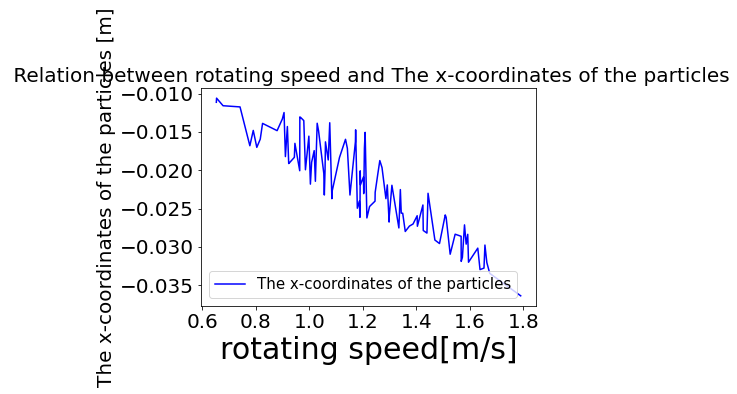

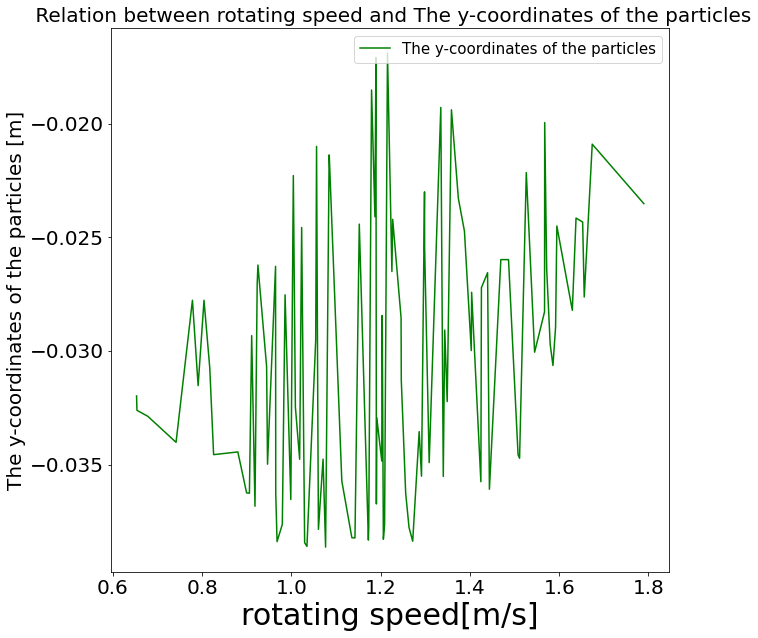

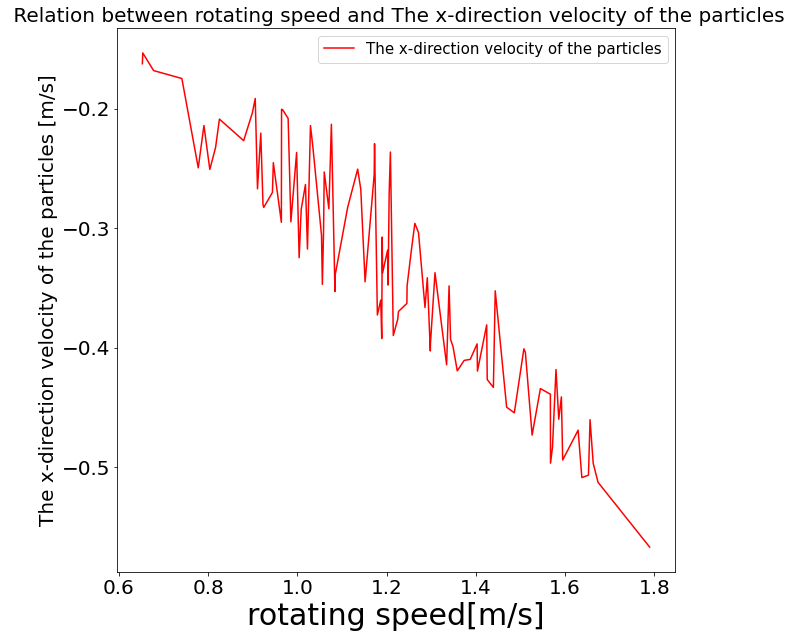

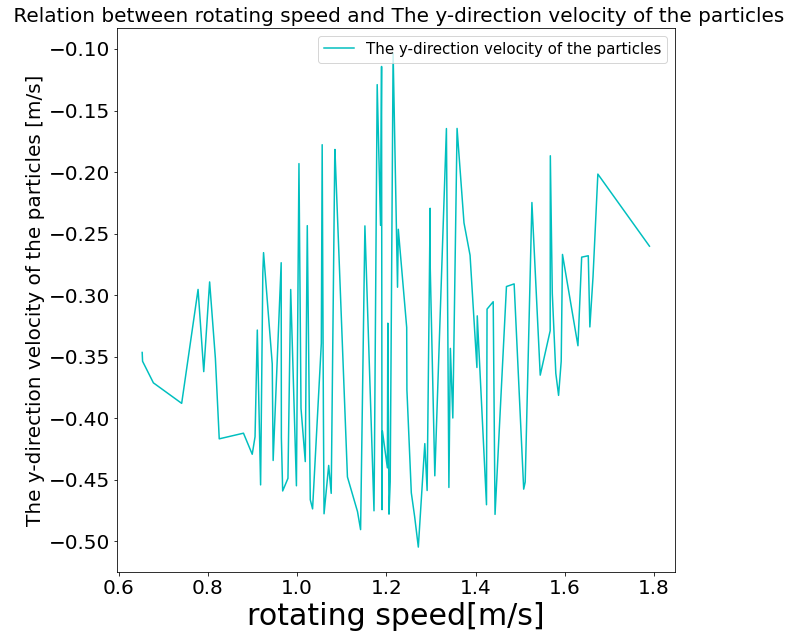

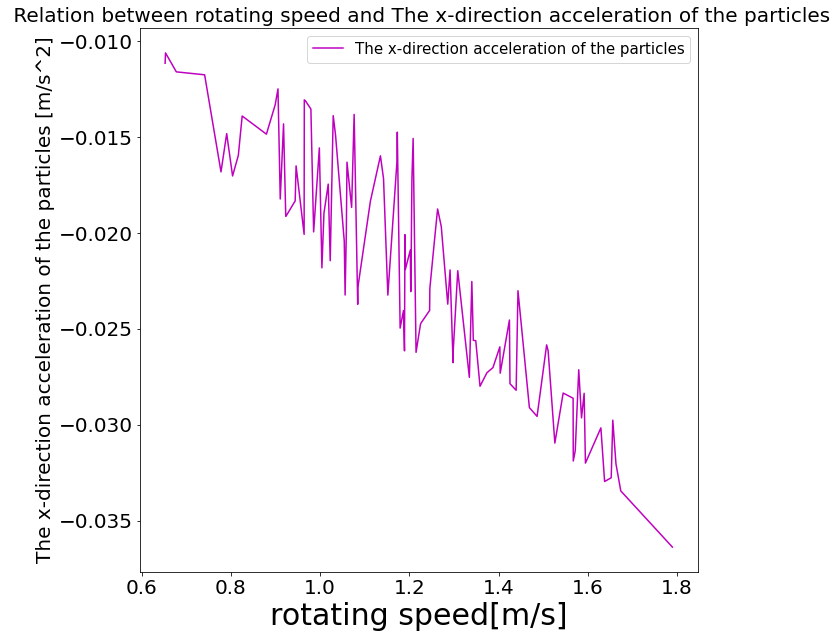

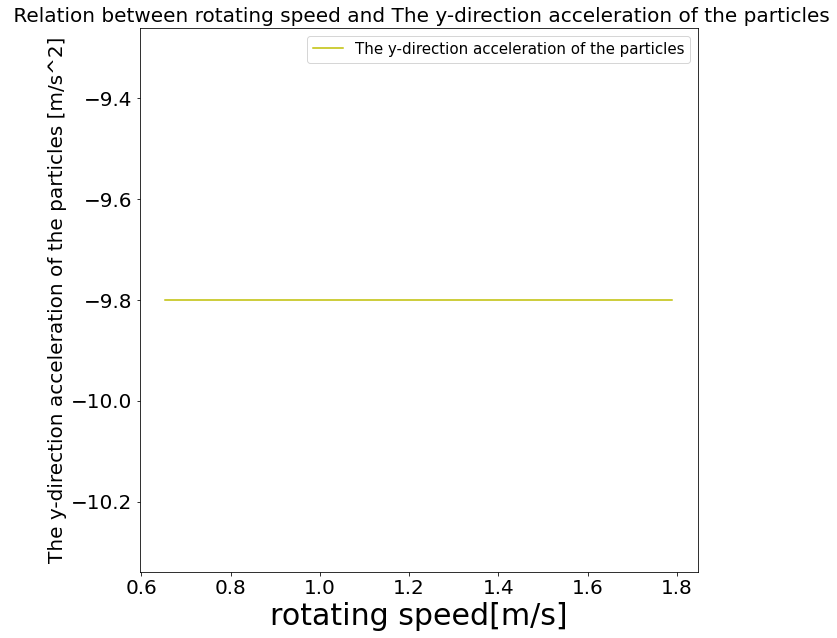

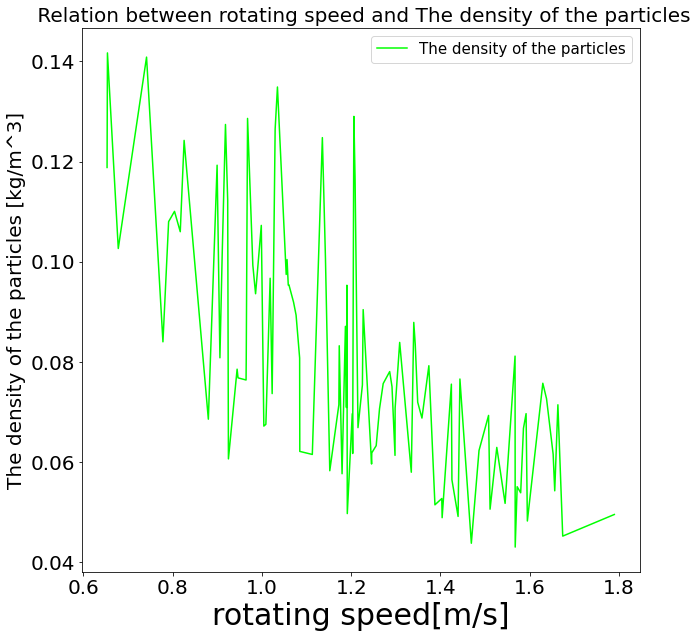

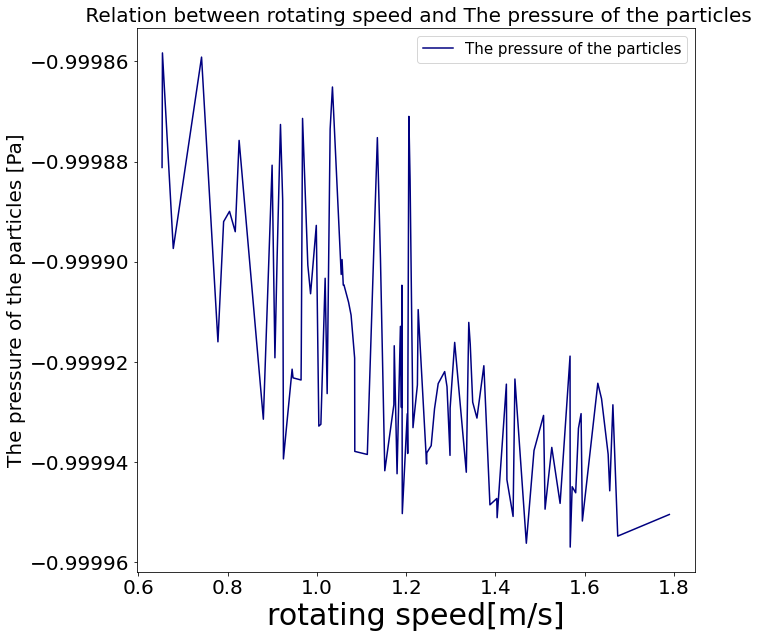

In [10]:
for i in range(NTargets):

    iModel = Model[i]
    rollerEffect = iModel.rollerEffectperData(meanAngularVelocity)
    
    
    plt.figure(i)
    plt.plot(rollerEffect[:,0], rollerEffect[:,1], label=iModel.TargetName, color=ColorList[i])
    plt.xlabel('rotating speed[m/s]', fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(f" Relation between rotating speed and {iModel.TargetName}", fontsize=20)
    plt.ylabel(f"{iModel.TargetName} {iModel.Unit}", fontsize=20)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.legend(prop={'size': 15})
    plt.show()

# Mean values

### per particle

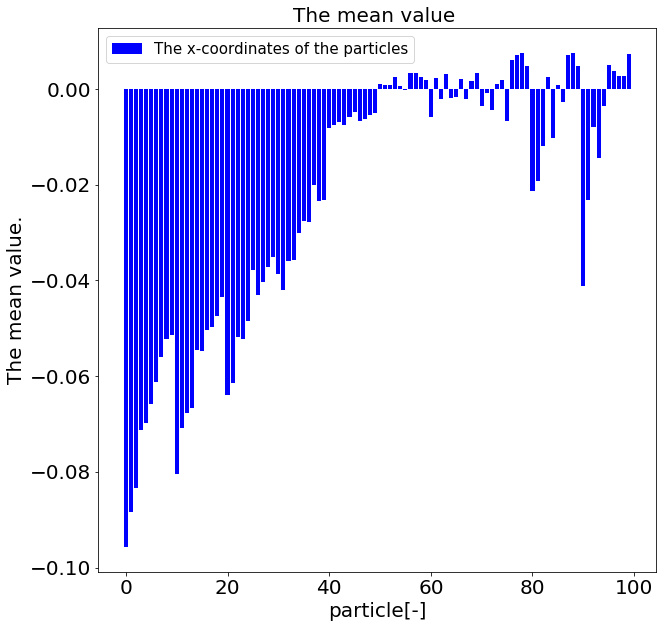

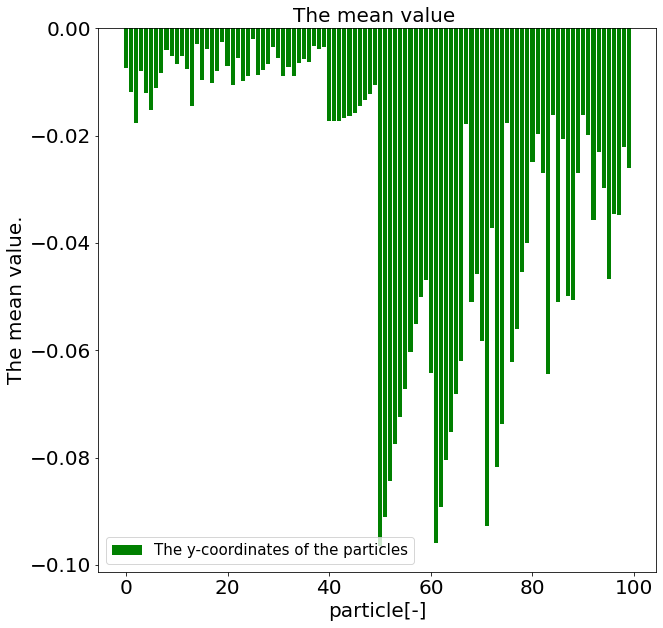

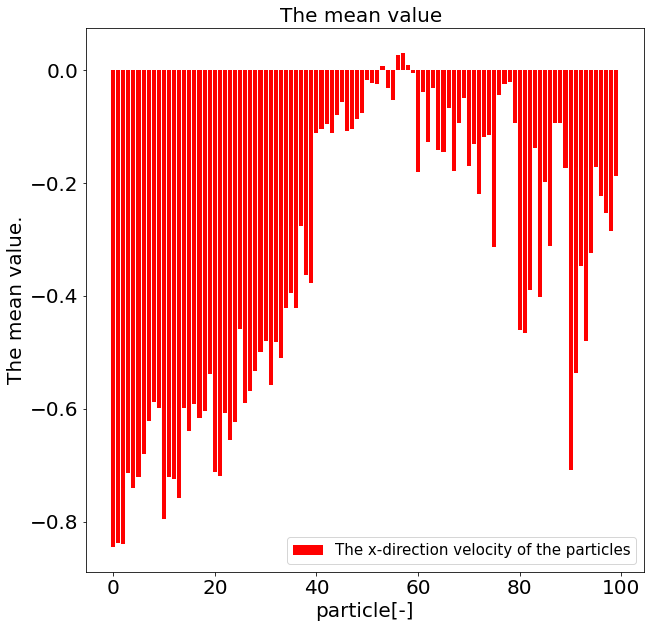

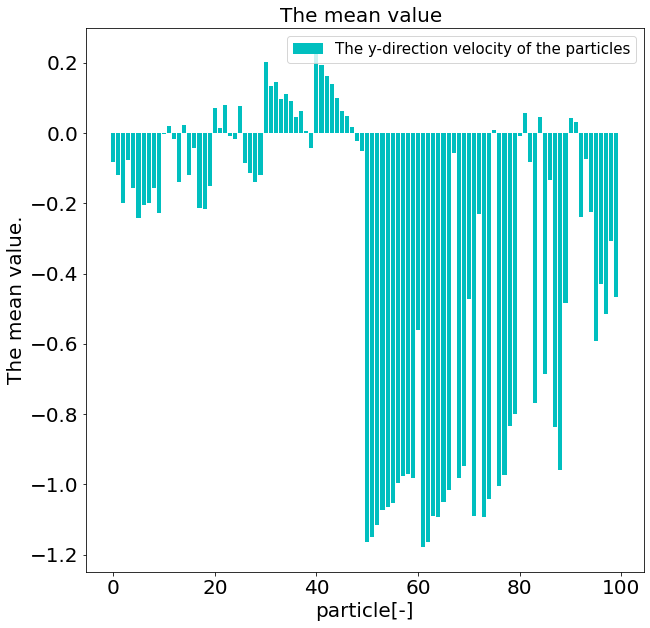

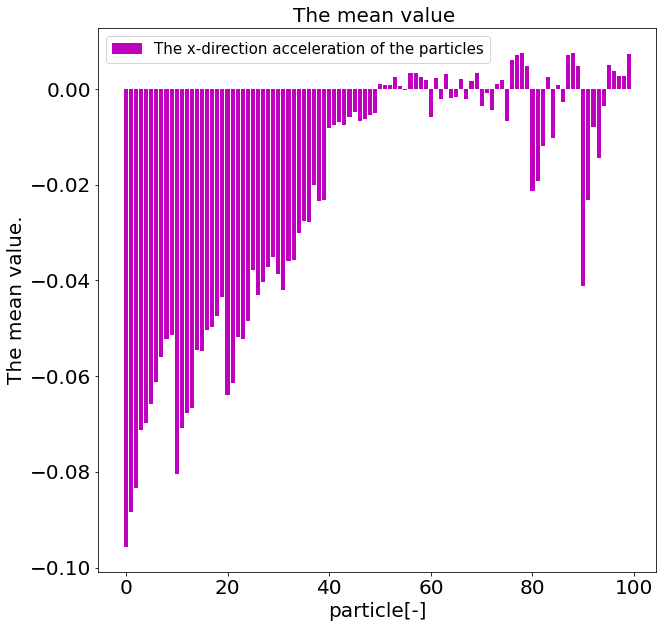

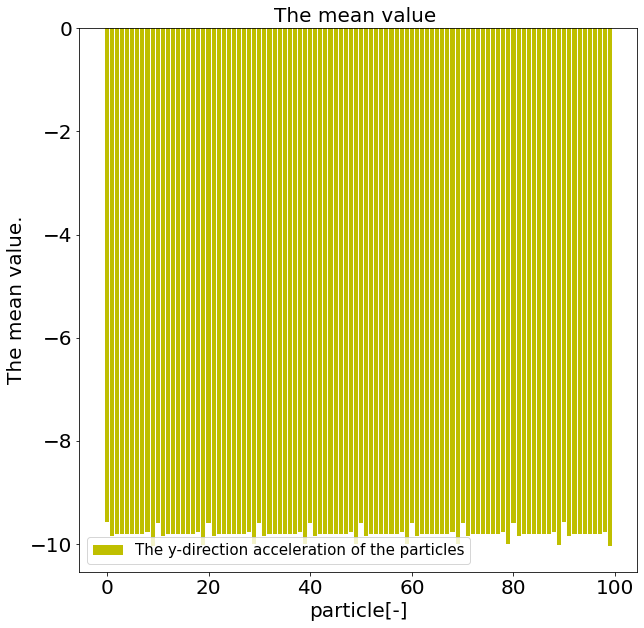

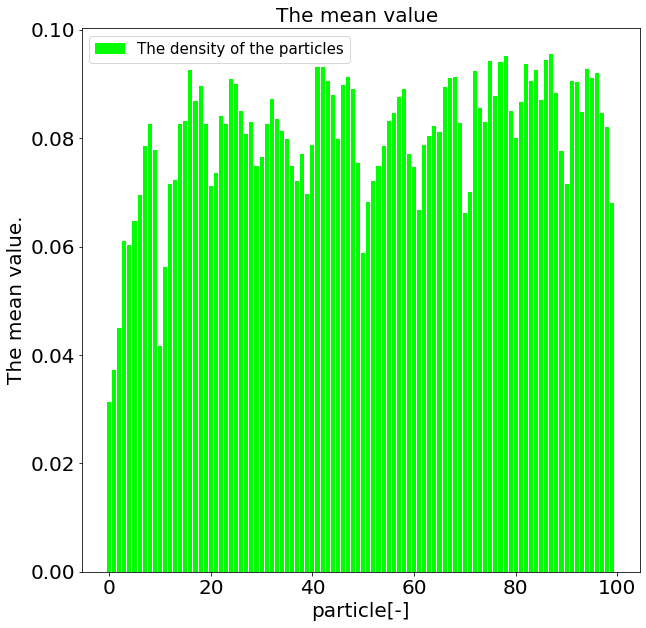

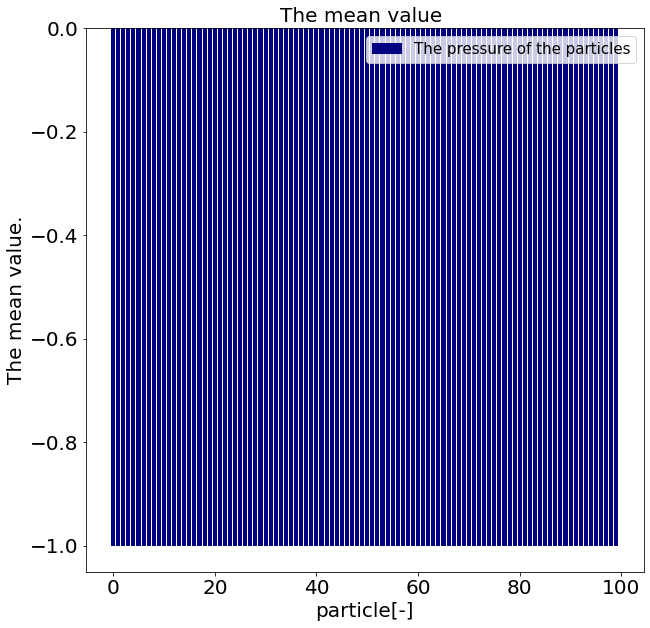

In [11]:
for i in range(NTargets):

    iModel = Model[i]
    meanData = iModel.meanDataset(NData)
    meanData= np.sum(meanData, axis=-3)/(NTimeSteps)
    
    plt.figure(i)
    plt.bar(np.arange(NParticles), meanData.flatten(), label=iModel.TargetName, color=ColorList[i])
    plt.xlabel('particle[-]', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("The mean value ", fontsize=20)
    plt.ylabel("The mean value.", fontsize=20)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.legend(prop={'size': 15})
    plt.show()

### per time-step

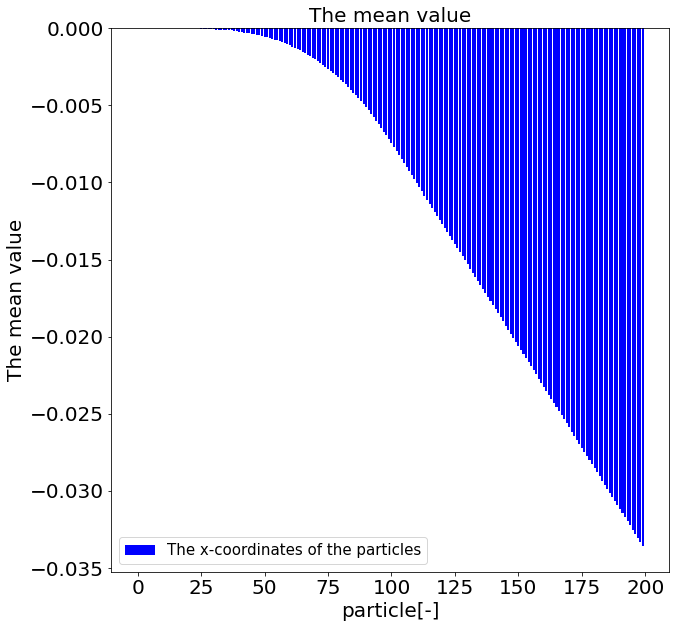

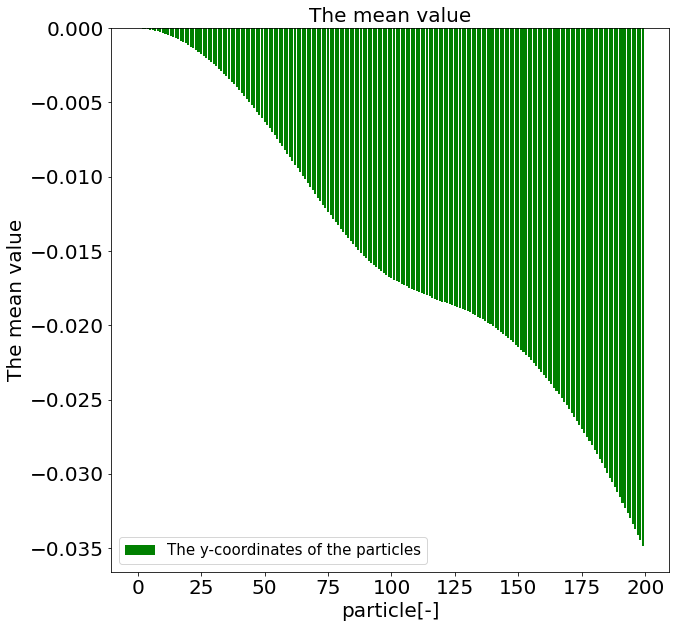

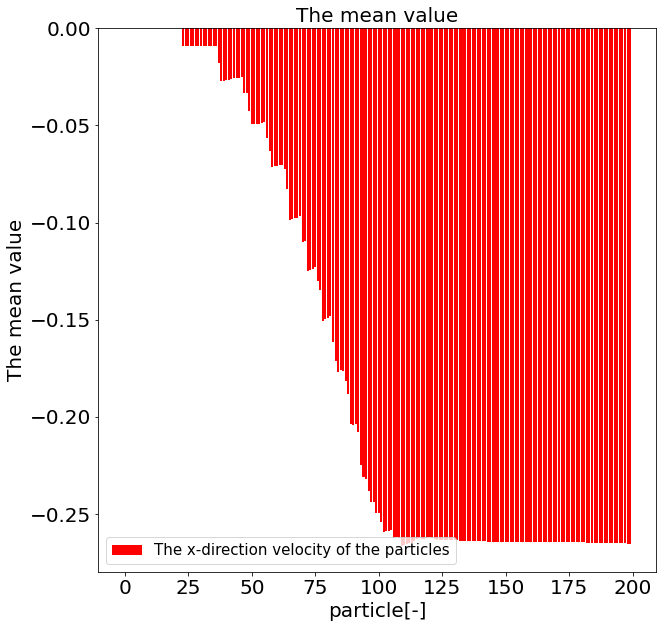

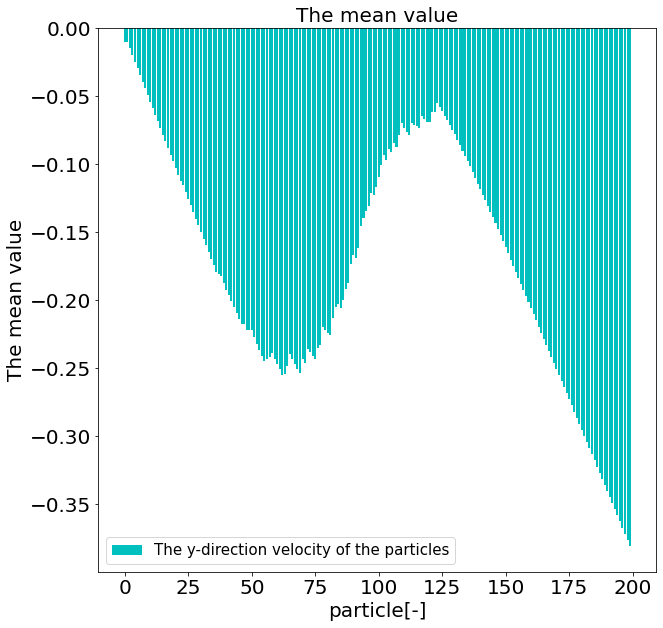

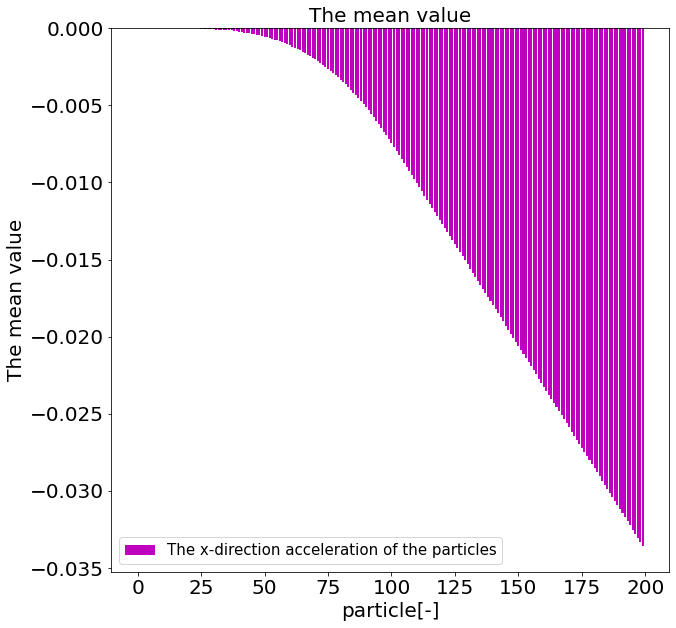

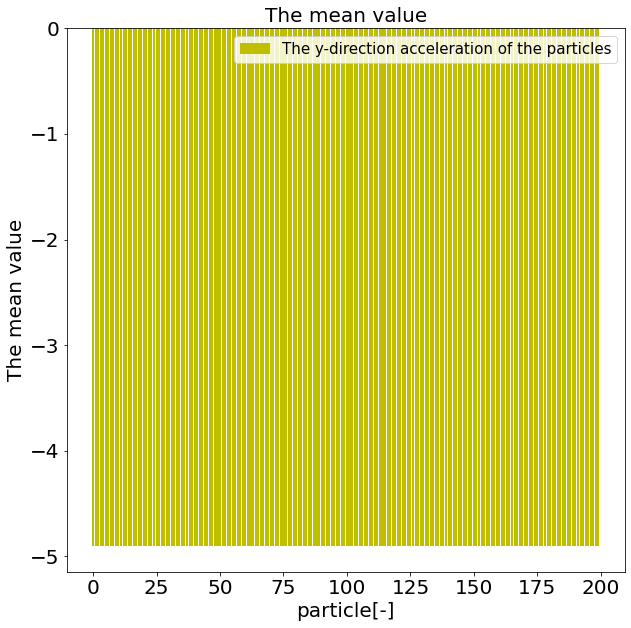

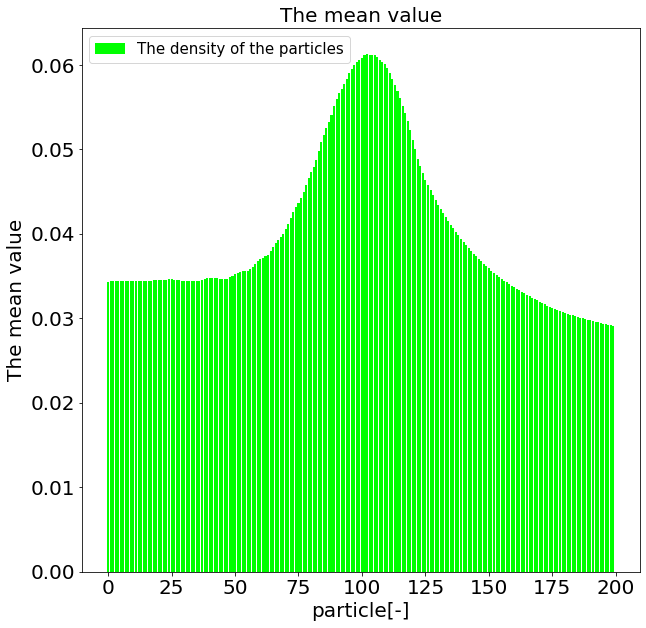

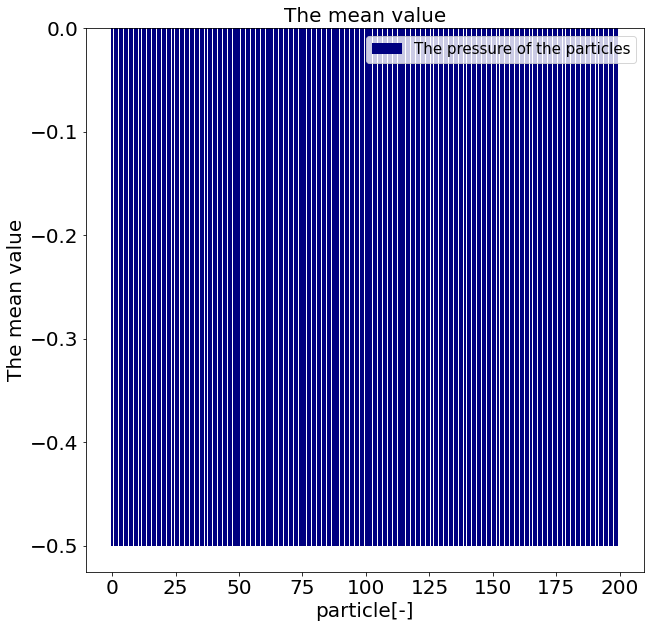

In [12]:
for i in range(NTargets):

    iModel = Model[i]
    meanData = iModel.meanDataset(NData)
    meanData= np.sum(meanData, axis=-2)/(NTimeSteps)

    plt.figure(i)
    plt.bar(np.arange(NTimeSteps), meanData.flatten(), label=iModel.TargetName, color=ColorList[i])
    plt.xlabel('particle[-]', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("The mean value", fontsize=20)
    plt.ylabel("The mean value", fontsize=20)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.legend(prop={'size': 15})
    plt.show()

# the sum of mean Standard deviation 

### Standard deviation per perticle

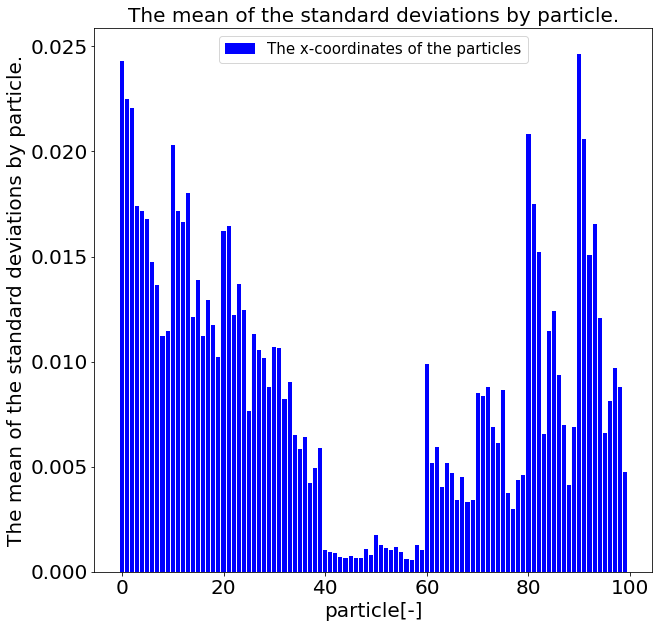

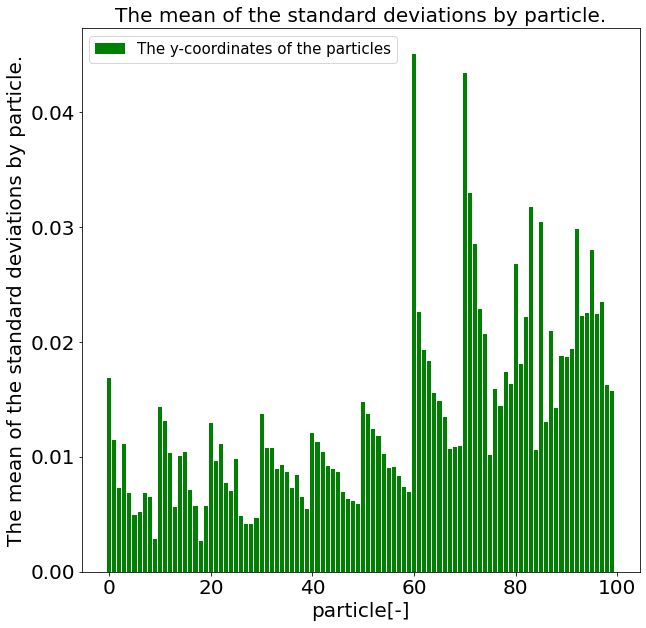

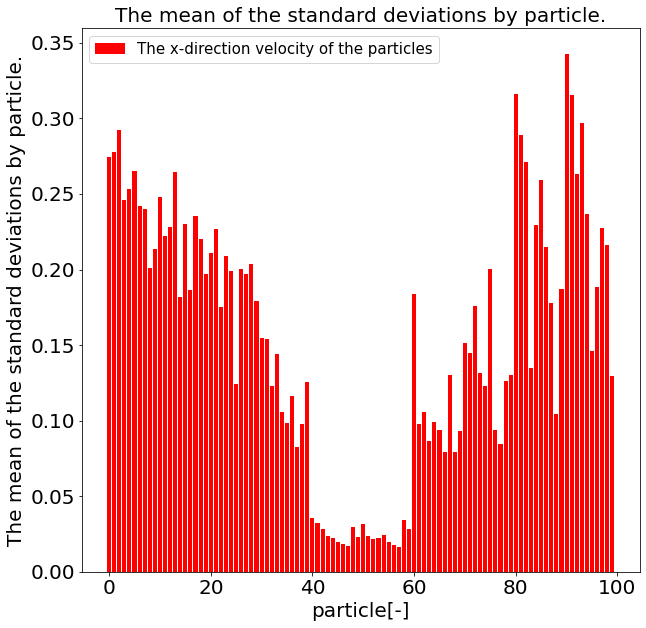

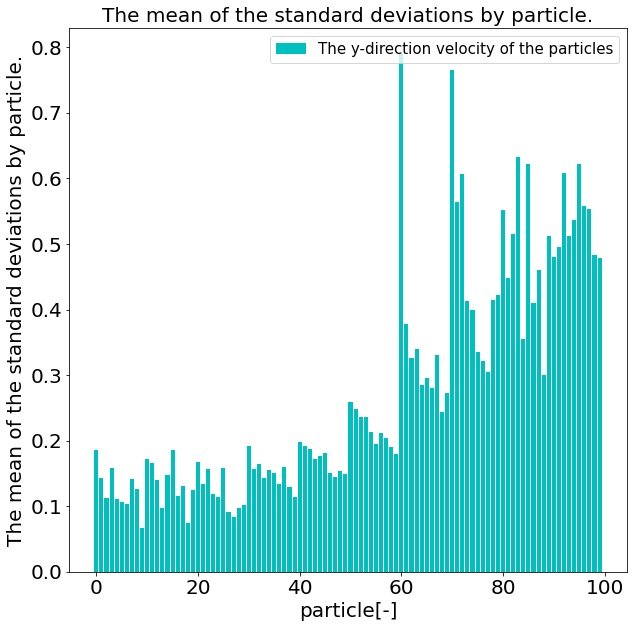

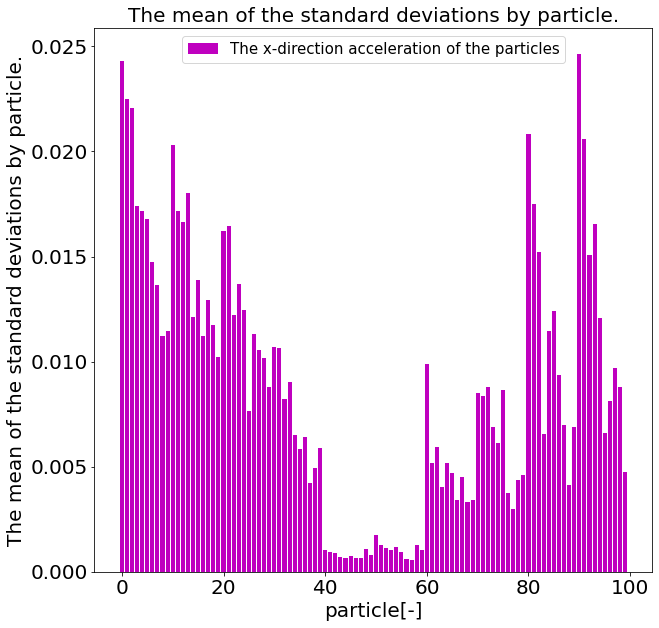

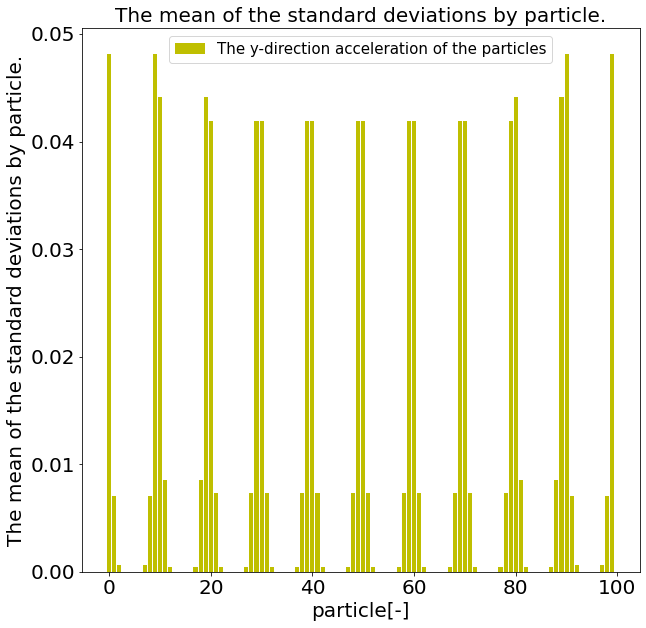

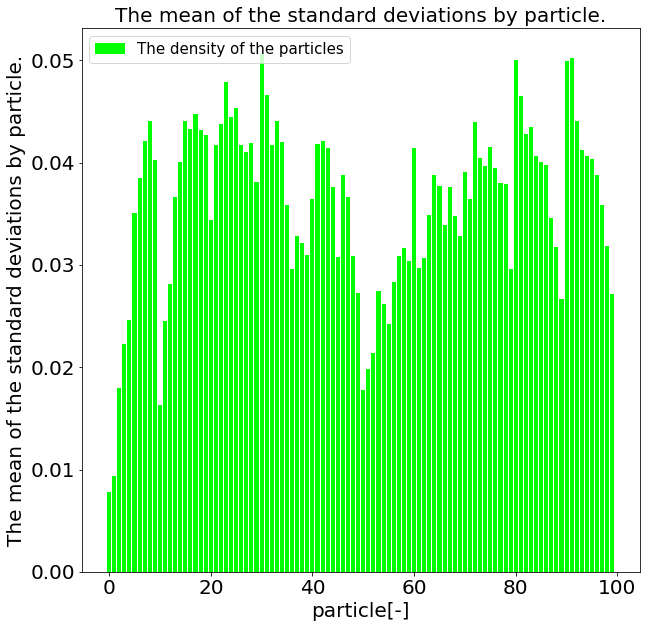

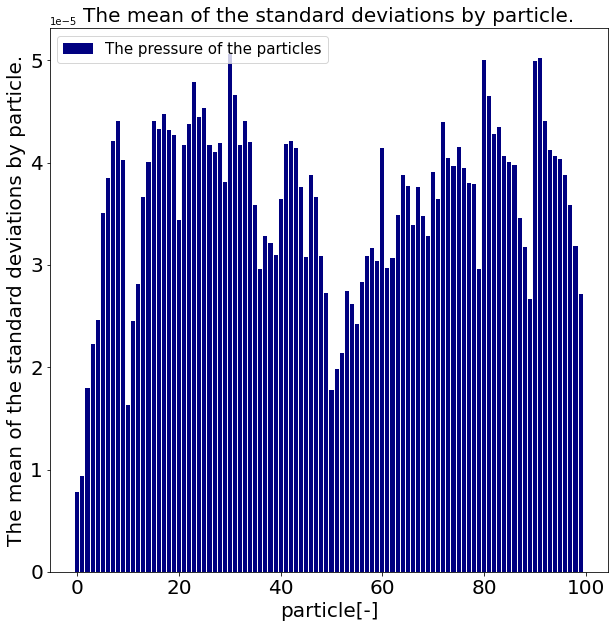

In [13]:
for i in range(NTargets):

    iModel = Model[i]
    stdData = iModel.stdDataset(NData)
    stdperParticle = np.sum(stdData, axis=-3)/(NTimeSteps)

    plt.figure(i)
    plt.bar(np.arange(NParticles), stdperParticle.flatten(), label=iModel.TargetName, color=ColorList[i])
    plt.xlabel('particle[-]', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("The mean of the standard deviations by particle.", fontsize=20)
    plt.ylabel("The mean of the standard deviations by particle.", fontsize=20)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.legend(prop={'size': 15})
    plt.show()

### Standard deviation per timestep

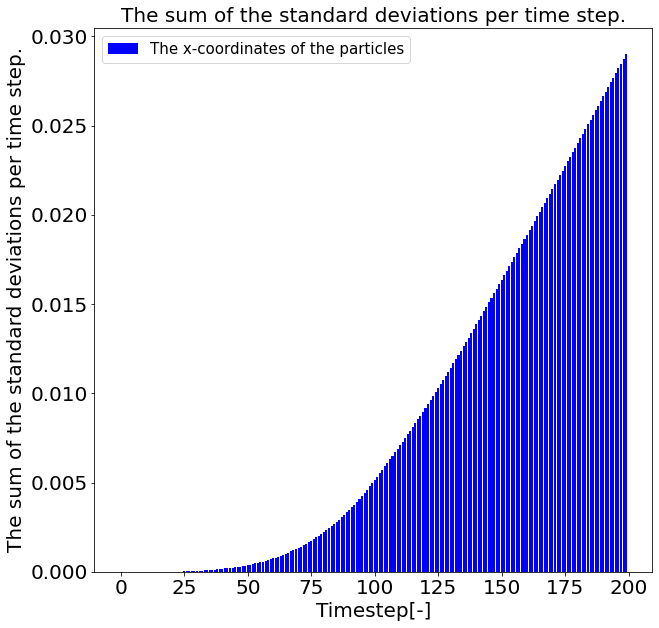

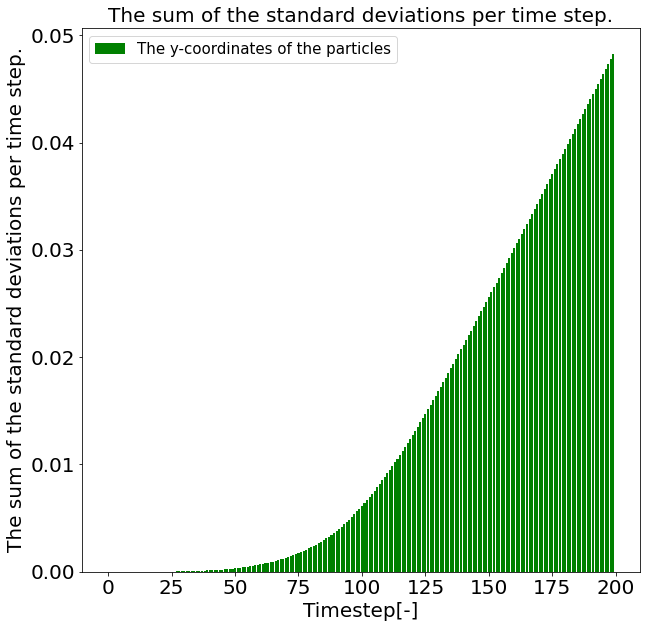

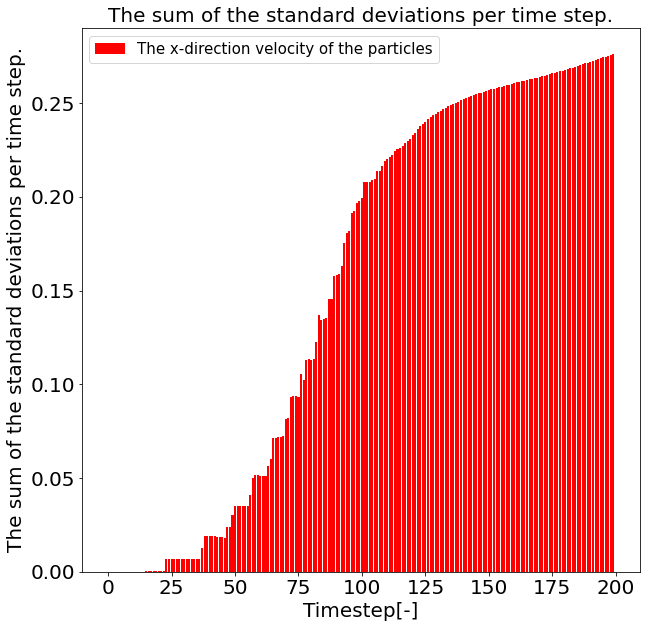

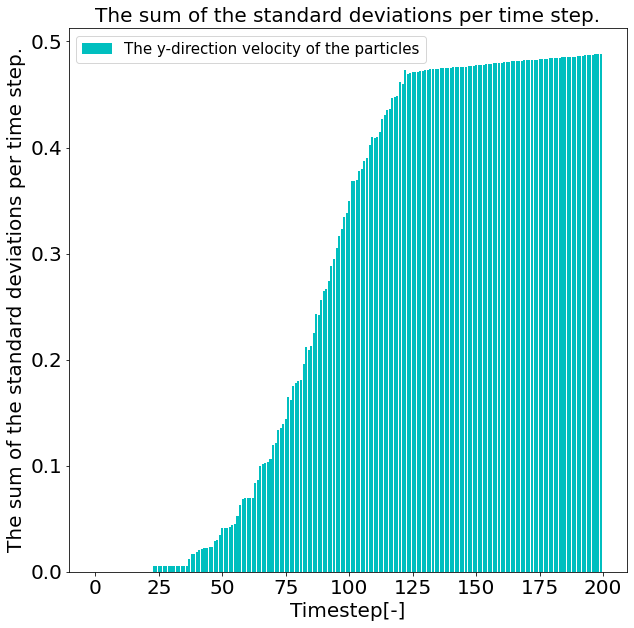

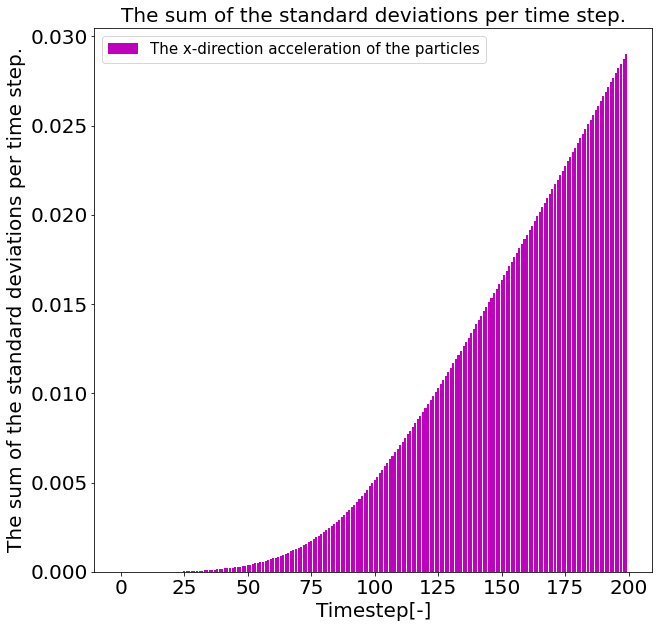

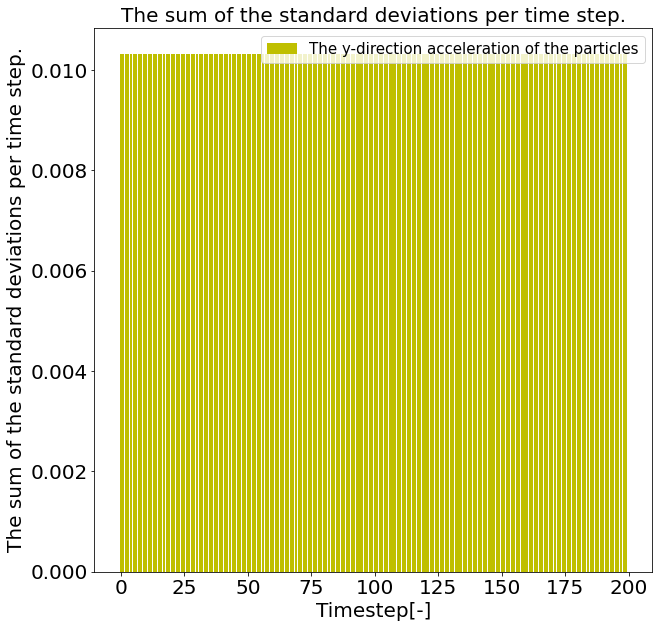

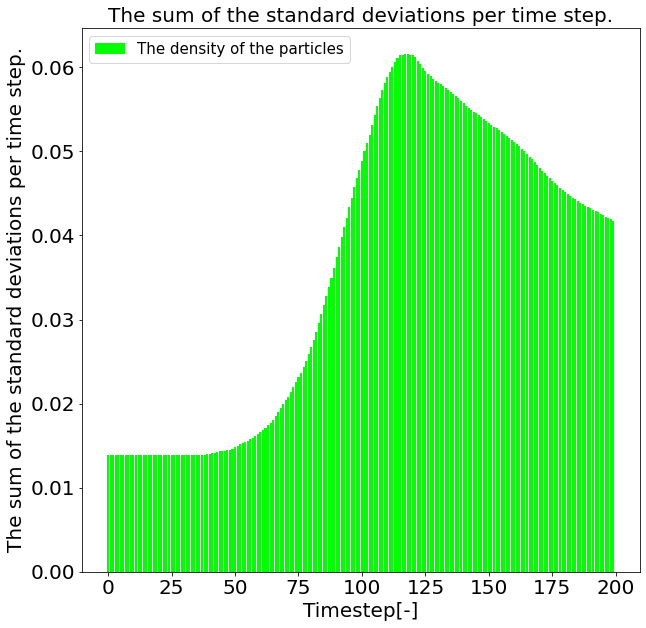

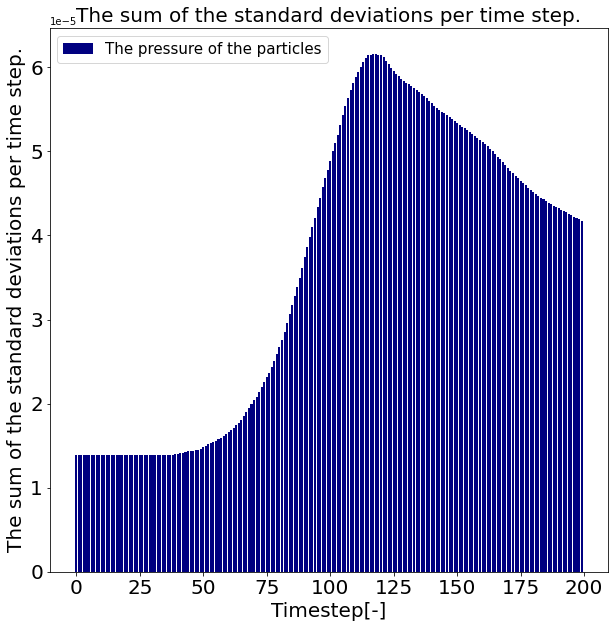

In [14]:
for i in range(NTargets):

    iModel = Model[i]
    stdData = iModel.stdDataset(NData)
    stdperTimeSteps = np.sum(stdData, axis=-2)/NParticles

    plt.figure(i)
    plt.bar(np.arange(NTimeSteps),stdperTimeSteps.flatten() , label=iModel.TargetName, color=ColorList[i])
    plt.xlabel('Timestep[-]', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("The sum of the standard deviations per time step.",fontsize=20)
    plt.ylabel("The sum of the standard deviations per time step.",fontsize=20)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.legend(prop={'size': 15})
    plt.show()

# The number of times that the "addRollerEffect" alogrithm was excuted

### per Particle

In [15]:
CollidingPerParticle = npCollidingTotal
CollidingPerParticle = np.sum(CollidingPerParticle,axis=-4)/NData
CollidingPerParticle= np.sum(CollidingPerParticle,axis=-3)

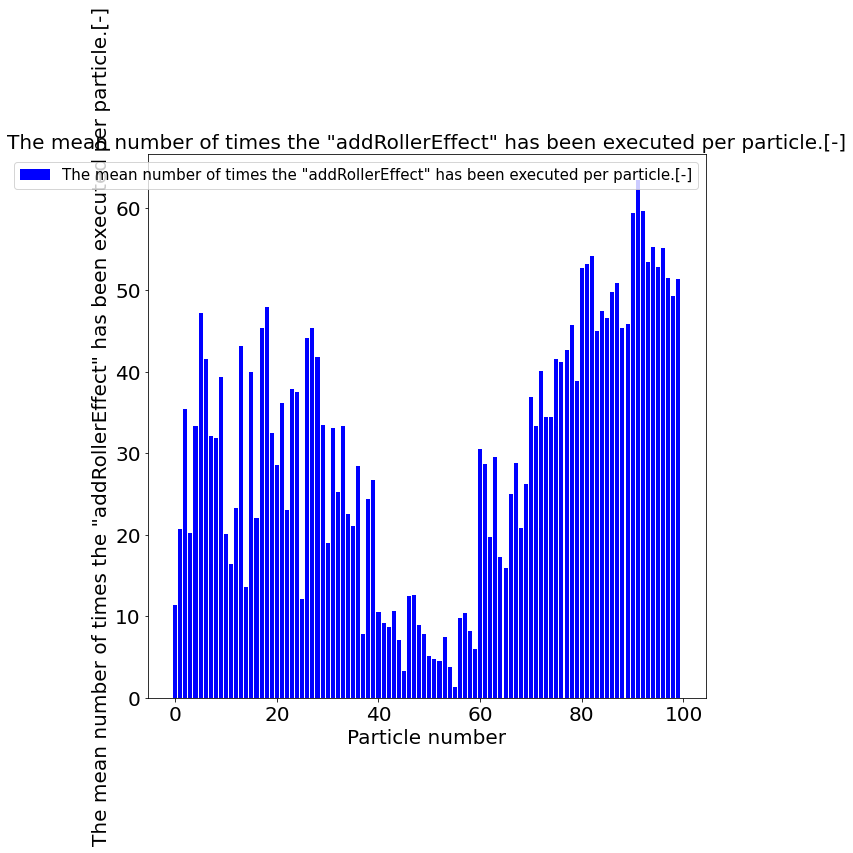

In [16]:
plt.figure(1)
plt.bar(np.arange(100),CollidingPerParticle.flatten(),label = "The mean number of times the \"addRollerEffect\" has been executed per particle.[-]", color = 'b')
plt.xlabel('Particle number', fontsize = 20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.title("The mean number of times the \"addRollerEffect\" has been executed per particle.[-]",fontsize=20)
plt.ylabel('The mean number of times the \"addRollerEffect\" has been executed per particle.[-]',fontsize=20)
plt.rcParams['figure.figsize'] = [15, 15]
plt.legend(prop={'size': 15})
plt.show()

### per timestep

In [17]:
CollidingPerTimeStep = npCollidingTotal
CollidingPerTimeStep = np.sum(CollidingPerTimeStep,axis=-4)/NData
CollidingPerTimeStep = np.sum(CollidingPerTimeStep,axis=-2)


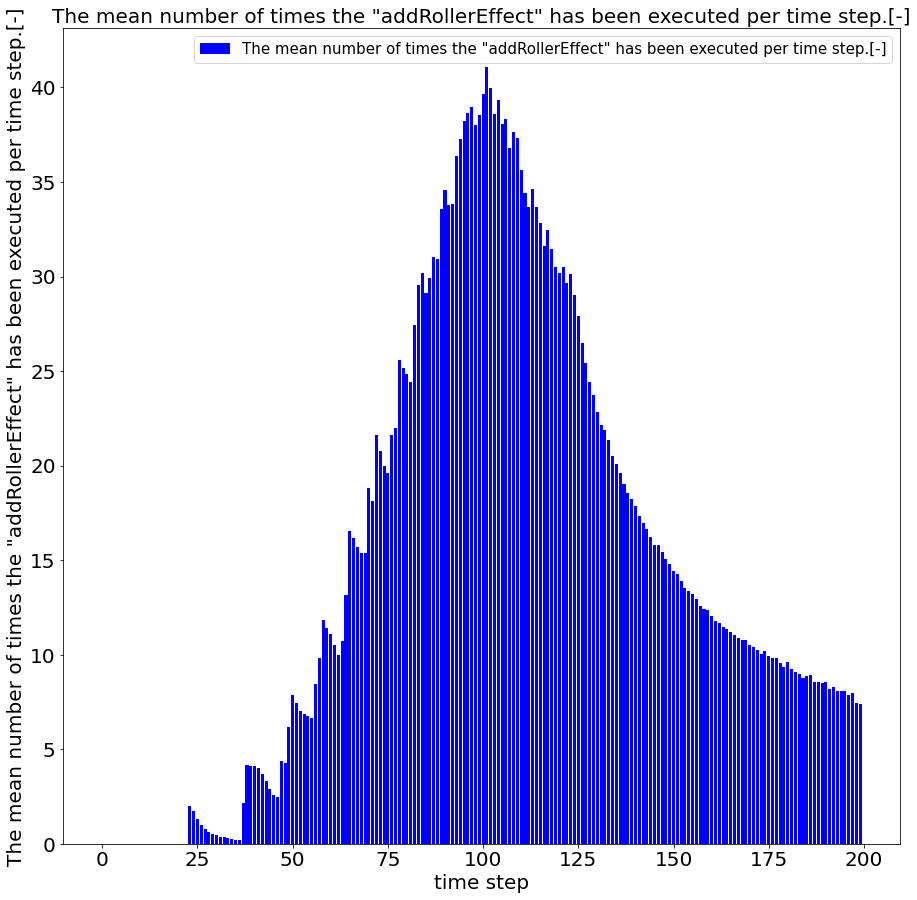

In [18]:
plt.figure(1)
plt.bar(np.arange(200),CollidingPerTimeStep.flatten(),label = "The mean number of times the \"addRollerEffect\" has been executed per time step.[-]", color = 'b')
plt.xlabel('time step', fontsize = 20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.title("The mean number of times the \"addRollerEffect\" has been executed per time step.[-]",fontsize=20)
plt.ylabel('The mean number of times the \"addRollerEffect\" has been executed per time step.[-]',fontsize=20)
plt.rcParams['figure.figsize'] = [15, 15]
plt.legend(prop={'size': 15})
plt.show()

# The initial position of particle no.40 to particle no.60

In [19]:
X = np.linspace(-0.02, 0.02, 10).reshape(10,1)
Y = np.linspace(-0.02, 0.02, 10).reshape(10,1)
posX = (X * np.ones_like(Y).T).flatten()[40:60]
posY = (Y * np.ones_like(X).T).T.flatten()[40:60]
pos = np.vstack((posX,posY)).T


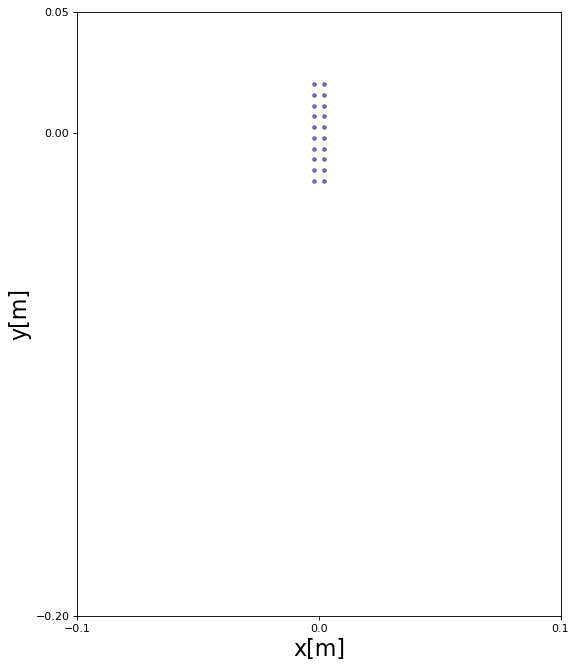

In [20]:
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = plt.subplot()
plt.sca(ax)
plt.cla()
cval = np.maximum(30 , 0).flatten()
plt.scatter(pos[:,0], pos[:,1], s=10,c="navy", alpha=0.5)
ax.set(xlim=(-0.10, 0.10), ylim=(-0.20, 0.05))
plt.xlabel("x[m]", fontsize = 20)
plt.ylabel("y[m]", fontsize = 20)
ax.set_aspect('equal', 'box')
ax.set_xticks([-0.10, 0, 0.10])
ax.set_yticks([-0.20, 0, 0.05])


plt.show()

